In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import requests
import json
import pandas as pd

In [3]:
lda = pd.read_csv("news_data/lda.csv")
sentiment = pd.read_csv("news_data/sentiment.csv")

In [4]:
columns_to_drop = ['headline.main', 'snippet', 'headline_lemmas', 'snippet_lemmas', 'Headline_Topic_0', 'Headline_Topic_1', 'Headline_Topic_2', 'Headline_Topic_3', 'Headline_Topic_4', 'Headline_Topic_5', 'Headline_Topic_6', 'Headline_Topic_7',	'Headline_Topic_8',	'Headline_Topic_9']
lda = lda.drop(columns=columns_to_drop)

In [5]:
df = pd.merge(lda, sentiment, on='pub_date')

In [6]:
df.rename(columns={'pub_date': 'Date'}, inplace=True)

In [7]:
columns_to_drop = ['headline.main', 'snippet', 'headline_lemmas', 'snippet_lemmas']
df = df.drop(columns=columns_to_drop)

In [8]:
# AAPL = pd.read_csv("stock_data/AAPL_stock.csv")
SP500 = pd.read_csv("stock_data/^GSPC_stock.csv")

In [9]:
# df = pd.merge(df, AAPL, on='Date')
df = pd.merge(df, SP500, on='Date')
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.head(2)

,Date,Snippet_Topic_0,Snippet_Topic_1,Snippet_Topic_2,Snippet_Topic_3,Snippet_Topic_4,Snippet_Topic_5,Snippet_Topic_6,Snippet_Topic_7,Snippet_Topic_8,...,headline_VADER,snippet_AFINN,headline_AFINN,Open,High,Low,Close,Adj Close,Volume,Change
0,2016-01-04,0.052622,0.174544,0.098013,0.100112,0.091911,0.093861,0.098956,0.063269,0.079981,...,-0.9847,32.0,-1.0,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,-0.012531
1,2016-01-05,0.033050,0.146251,0.097828,0.106968,0.079792,0.153481,0.102184,0.049106,0.100992,...,-0.9988,-30.0,-95.0,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,0.001455


In [11]:
columns_to_drop = ['Open', 'High', 'Low','Adj Close']
df = df.drop(columns=columns_to_drop)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1004 non-null   datetime64[ns]
 1   Snippet_Topic_0  1004 non-null   float64       
 2   Snippet_Topic_1  1004 non-null   float64       
 3   Snippet_Topic_2  1004 non-null   float64       
 4   Snippet_Topic_3  1004 non-null   float64       
 5   Snippet_Topic_4  1004 non-null   float64       
 6   Snippet_Topic_5  1004 non-null   float64       
 7   Snippet_Topic_6  1004 non-null   float64       
 8   Snippet_Topic_7  1004 non-null   float64       
 9   Snippet_Topic_8  1004 non-null   float64       
 10  Snippet_Topic_9  1004 non-null   float64       
 11  snippet_VADER    1004 non-null   float64       
 12  headline_VADER   1004 non-null   float64       
 13  snippet_AFINN    1004 non-null   float64       
 14  headline_AFINN   1004 non-null   float64

In [13]:
from pmdarima import auto_arima

# Load dataset (assuming df is already available in memory)
# Splitting dataset chronologically
train_size = int(len(df) * 2 / 3)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Use auto_arima to find the optimal order
auto_model = auto_arima(train['Close'], seasonal=True, m=12, trace=True, suppress_warnings=True, stepwise=True)

# Get the best order and seasonal order
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

best_order, best_seasonal_order


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5701.474, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5709.223, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5709.512, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5708.752, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5711.123, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5702.539, Time=2.98 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=5702.540, Time=7.16 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=5695.417, Time=16.90 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=5699.638, Time=10.20 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=5695.708, Time=10.96 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5695.334, Time=10.06 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5698.022, Time=6.74 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=5698.813, Time=7.29 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=5701.398, Time=6.96 sec
 ARIMA(3,1,2)(1

((2, 1, 2), (1, 0, 2, 12))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05184D+00    |proj g|=  2.83249D-02


 This problem is unconstrained.



At iterate    5    f=  4.05092D+00    |proj g|=  1.03221D-02

At iterate   10    f=  4.05011D+00    |proj g|=  3.48556D-03

At iterate   15    f=  4.04916D+00    |proj g|=  2.28189D-02

At iterate   20    f=  4.04900D+00    |proj g|=  8.53203D-04

At iterate   25    f=  4.04898D+00    |proj g|=  3.16909D-04

At iterate   30    f=  4.04898D+00    |proj g|=  7.66763D-04

At iterate   35    f=  4.04897D+00    |proj g|=  1.71333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     44      1     0     0   7.365D-05   4.049D+00
  F =   4.0489747330285519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

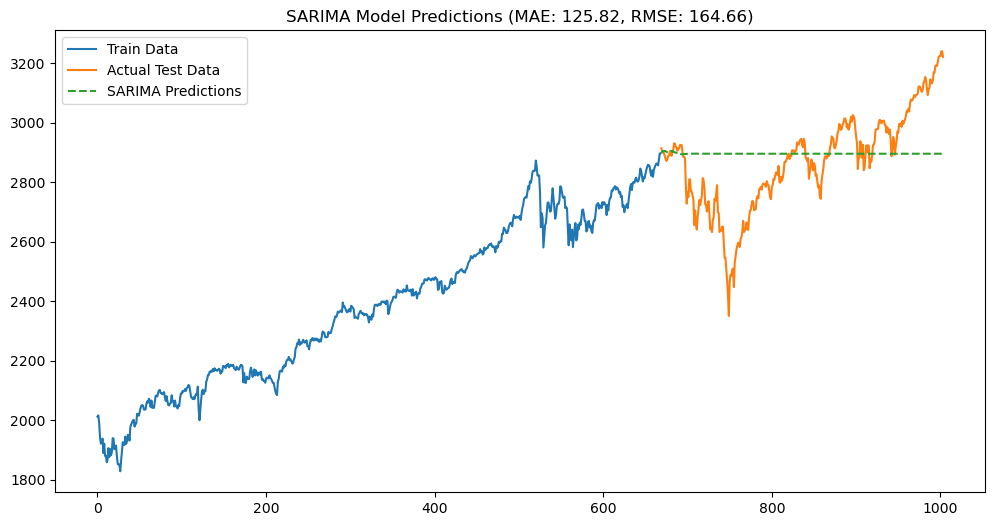

(125.81621074273187, 164.66183759168712)

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Fit SARIMA model using the best order found
model = SARIMAX(train['Close'], order=best_order, seasonal_order=best_seasonal_order, 
                enforce_stationarity=False, enforce_invertibility=False)
sarima_result = model.fit()

# Define integer positions for start and end
start = len(train)
end = start + len(test) - 1

# Forecast using integer positions
predictions = sarima_result.predict(start=start, end=end, dynamic=False)


# Evaluate model
mae = mean_absolute_error(test['Close'], predictions)
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label="Train Data")
plt.plot(test.index, test['Close'], label="Actual Test Data")
plt.plot(test.index, predictions, label="SARIMA Predictions", linestyle="dashed")
plt.legend()
plt.title(f"SARIMA Model Predictions (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
plt.show()

mae, rmse

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure dataset is properly formatted
df.index = pd.to_datetime(df.index)
df.set_index('Date', inplace=True)

# Define target variable and exogenous features
target_col = 'Close'
exog_features = [col for col in df.columns if col not in ['Close', 'Adj Close', 'Change']]

# Split dataset into training and testing sets chronologically
train_size = int(len(df) * 2 / 3)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Prepare exogenous variables
train_exog = sm.add_constant(train[exog_features])  # Add intercept for OLS
test_exog = sm.add_constant(test[exog_features])

# Fit an Ordinary Least Squares (OLS) regression model to assess feature importance
ols_model = sm.OLS(train[target_col], train_exog).fit()

# Extract feature importance (coefficients & p-values)
feature_importance = pd.DataFrame({
    'Feature': train_exog.columns,
    'Coefficient': ols_model.params,
    'P-Value': ols_model.pvalues
}).reset_index(drop=True)

feature_importance

,Feature,Coefficient,P-Value
0,const,2.474360e+03,1.562284e-250
1,Snippet_Topic_0,3.173322e+02,5.511243e-02
2,Snippet_Topic_1,6.266777e+02,5.035440e-07
3,Snippet_Topic_2,8.074708e+02,2.447833e-09
4,Snippet_Topic_3,3.067353e+02,5.117821e-02
5,Snippet_Topic_4,8.636928e+02,6.368548e-10
6,Snippet_Topic_5,1.657489e+02,1.837751e-01
7,Snippet_Topic_6,8.475181e+02,9.466721e-07
8,Snippet_Topic_7,1.965961e+02,6.890859e-02
9,Snippet_Topic_8,-1.432309e+03,8.203897e-23


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           24     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03597D+00    |proj g|=  6.32276D+09


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   24      1     21      1     0     0   6.323D+09   4.036D+00
  F =   4.0359669735435242     

ABNORMAL_TERMINATION_IN_LNSRCH                              


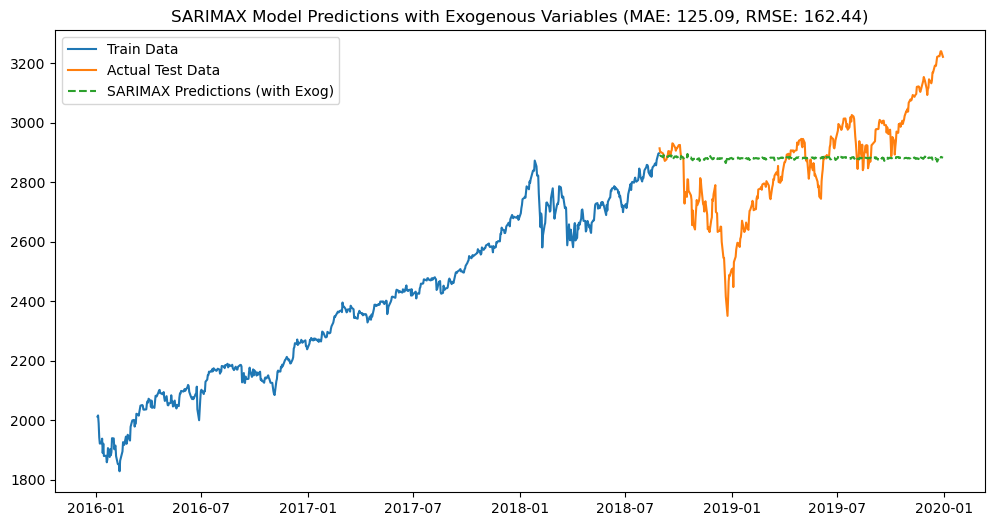

(125.08772409351555, 162.44000040884217)

In [20]:
# Define and fit SARIMAX model with exogenous variables
sarimax_exog_model = SARIMAX(
    train['Close'],
    exog=train_exog,
    order=best_order,
    seasonal_order=best_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
sarimax_exog_result = sarimax_exog_model.fit()

# Forecast for test period using exogenous variables
start = len(train)
end = start + len(test) - 1
predictions_exog = sarimax_exog_result.predict(start=start, end=end, exog=test_exog, dynamic=False)

# Evaluate the model
mae_exog = mean_absolute_error(test['Close'], predictions_exog)
mse_exog = mean_squared_error(test['Close'], predictions_exog)
rmse_exog = np.sqrt(mse_exog)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label="Train Data")
plt.plot(test.index, test['Close'], label="Actual Test Data")
plt.plot(test.index, predictions_exog, label="SARIMAX Predictions (with Exog)", linestyle="dashed")
plt.legend()
plt.title(f"SARIMAX Model Predictions with Exogenous Variables (MAE: {mae_exog:.2f}, RMSE: {rmse_exog:.2f})")
plt.show()

# Output evaluation metrics
mae_exog, rmse_exog


In [93]:
train_exog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 669 entries, 2016-01-04 to 2018-08-28
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Snippet_Topic_0  669 non-null    float64
 1   Snippet_Topic_1  669 non-null    float64
 2   Snippet_Topic_2  669 non-null    float64
 3   Snippet_Topic_3  669 non-null    float64
 4   Snippet_Topic_4  669 non-null    float64
 5   Snippet_Topic_5  669 non-null    float64
 6   Snippet_Topic_6  669 non-null    float64
 7   Snippet_Topic_7  669 non-null    float64
 8   Snippet_Topic_8  669 non-null    float64
 9   Snippet_Topic_9  669 non-null    float64
 10  snippet_VADER    669 non-null    float64
 11  headline_VADER   669 non-null    float64
 12  snippet_AFINN    669 non-null    float64
 13  headline_AFINN   669 non-null    float64
 14  Open             669 non-null    float64
 15  High             669 non-null    float64
 16  Low              669 non-null    float64
 1

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2016-01-04 to 2019-12-30
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Snippet_Topic_0  1004 non-null   float64
 1   Snippet_Topic_1  1004 non-null   float64
 2   Snippet_Topic_2  1004 non-null   float64
 3   Snippet_Topic_3  1004 non-null   float64
 4   Snippet_Topic_4  1004 non-null   float64
 5   Snippet_Topic_5  1004 non-null   float64
 6   Snippet_Topic_6  1004 non-null   float64
 7   Snippet_Topic_7  1004 non-null   float64
 8   Snippet_Topic_8  1004 non-null   float64
 9   Snippet_Topic_9  1004 non-null   float64
 10  snippet_VADER    1004 non-null   float64
 11  headline_VADER   1004 non-null   float64
 12  snippet_AFINN    1004 non-null   float64
 13  headline_AFINN   1004 non-null   float64
 14  Close            1004 non-null   float64
 15  Volume           1004 non-null   int64  
 16  Change           1004 non-null   float64
d

In [21]:
from statsmodels.tsa.stattools import grangercausalitytests

# Ensure dataset is formatted correctly
df.index = pd.to_datetime(df.index)

# Define target variable and exogenous features
target_col = 'Close'
exog_features = [col for col in df.columns if col not in ['Close', 'Adj Close', 'Change']]

# Perform Granger Causality Test for each feature
max_lag = 5  # Test up to 5 lags
granger_results = {}

for feature in exog_features:
    test_result = grangercausalitytests(df[[target_col, feature]], max_lag, verbose=False)
    p_values = [round(test_result[i][0]['ssr_ftest'][1], 4) for i in range(1, max_lag + 1)]
    granger_results[feature] = p_values

# Convert results to DataFrame for interpretation
granger_df = pd.DataFrame(granger_results, index=[f'Lag {i}' for i in range(1, max_lag + 1)])

# Display Granger Causality results
granger_df

,Snippet_Topic_0,Snippet_Topic_1,Snippet_Topic_2,Snippet_Topic_3,Snippet_Topic_4,Snippet_Topic_5,Snippet_Topic_6,Snippet_Topic_7,Snippet_Topic_8,Snippet_Topic_9,snippet_VADER,headline_VADER,snippet_AFINN,headline_AFINN,Volume
Lag 1,0.8522,0.4304,0.2489,0.4288,0.4555,0.2143,0.7605,0.4571,0.0925,0.6059,0.7501,0.6011,0.7466,0.8607,0.0939
Lag 2,0.7932,0.5746,0.4889,0.6980,0.7234,0.4578,0.0804,0.5957,0.1433,0.4439,0.8906,0.7266,0.3499,0.9225,0.1627
Lag 3,0.9212,0.7390,0.2363,0.7527,0.3122,0.6019,0.0320,0.7013,0.1146,0.5196,0.9565,0.6390,0.4056,0.9599,0.1525
Lag 4,0.9617,0.8546,0.1939,0.7720,0.4381,0.3443,0.0570,0.5682,0.0239,0.6420,0.8281,0.8628,0.4661,0.9453,0.2573
Lag 5,0.9856,0.9497,0.2919,0.7462,0.5162,0.3762,0.0952,0.5103,0.0448,0.7410,0.9119,0.7933,0.4857,0.8872,0.3743


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03812D+00    |proj g|=  6.32888D+09


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      1     21      1     0     0   6.329D+09   4.038D+00
  F =   4.0381157090447282     

ABNORMAL_TERMINATION_IN_LNSRCH                              


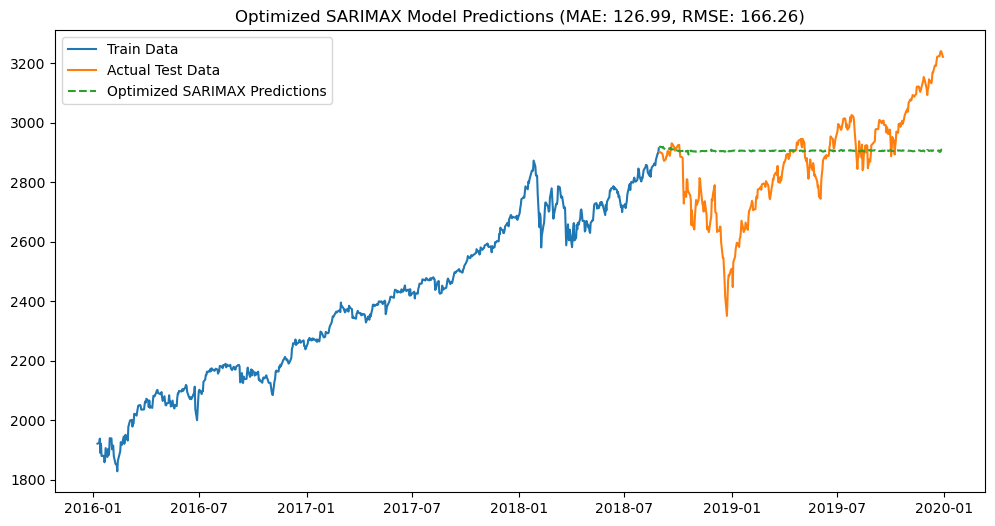

(126.98953002191742, 166.25616160309832)

In [22]:
# Shift selected exogenous variables based on Granger causality results
df['Snippet_Topic_8_Lag4'] = df['Snippet_Topic_8'].shift(4)
df['Snippet_Topic_6_Lag3'] = df['Snippet_Topic_6'].shift(3)
df['Volume_Lag1'] = df['Volume'].shift(1)
df['Volume_Lag2'] = df['Volume'].shift(2)
df['Volume_Lag3'] = df['Volume'].shift(3)

# Define final exogenous variables based on significant Granger causality results
final_exog_vars = ['Snippet_Topic_8_Lag4', 'Snippet_Topic_6_Lag3', 'Volume_Lag1', 'Volume_Lag2', 'Volume_Lag3']

# Drop NaN values caused by shifting
df = df.dropna()

# Split dataset chronologically into train and test
train_size = int(len(df) * 2 / 3)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Extract final exogenous variables for training and testing
train_exog = train[final_exog_vars]
test_exog = test[final_exog_vars]

# Define and fit SARIMAX model with optimized lag structure
sarimax_model = SARIMAX(
    train['Close'],
    exog=train_exog,
    order=best_order,
    seasonal_order=best_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
sarimax_result = sarimax_model.fit()

# Forecast using optimized exogenous variables
start = len(train)
end = start + len(test) - 1
predictions = sarimax_result.predict(start=start, end=end, exog=test_exog, dynamic=False)

# Evaluate the improved model
mae = mean_absolute_error(test['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test['Close'], predictions))

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label="Train Data")
plt.plot(test.index, test['Close'], label="Actual Test Data")
plt.plot(test.index, predictions, label="Optimized SARIMAX Predictions", linestyle="dashed")
plt.legend()
plt.title(f"Optimized SARIMAX Model Predictions (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
plt.show()

# Output evaluation metrics
mae, rmse


In [29]:
# Debugging LSTM prediction process to ensure no data leakage

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Ensure dataset is loaded and indexed properly
df.index = pd.to_datetime(df.index)

# Selecting target variable and exogenous features
target_col = 'Close'
exog_features = [col for col in df.columns if col not in ['Close']]

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target_col] + exog_features])

# Convert scaled data back to DataFrame for easy indexing
scaled_df = pd.DataFrame(scaled_data, columns=[target_col] + exog_features, index=df.index)

# Splitting into training and testing sets (chronologically)
train_size = int(len(df) * 2 / 3)
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, target_col, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)  # Past sequence
        y.append(data.iloc[i+seq_length][target_col])  # Target variable
    return np.array(X), np.array(y)

# Define sequence length (past days used for prediction)
seq_length = 10

# Creating training sequences
X_train, y_train = create_sequences(train, target_col, seq_length)

# **Fixing test prediction to prevent data leakage**
# Creating test input sequences using only training data (past test points not included)
X_test = []
y_test = test[target_col].values

# Start test prediction from the first test date using the last train sequence
current_sequence = train.iloc[-seq_length:].values

for i in range(len(test)):
    X_test.append(current_sequence)  # Store the current sequence as input
    predicted_value = model.predict(np.array([current_sequence]))[0][0]
    
    # Update sequence: remove first value, add predicted value (not actual y_test value)
    new_row = test.iloc[i].values.copy()  # Ensure we don't use actual test target
    new_row[0] = predicted_value  # Replace 'Close' with predicted value
    current_sequence = np.vstack([current_sequence[1:], new_row])

X_test = np.array(X_test)

# Get LSTM predictions
y_pred = model.predict(X_test)

# Reverse scaling for predictions and actual values
scaler_target = MinMaxScaler()
scaler_target.fit(df[[target_col]])

y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler_target.inverse_transform(y_pred)

# Evaluate model
mae_lstm = mean_absolute_error(y_test_actual, y_pred_actual)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

# Debug: Print a few test set actual vs predicted values to manually verify
debug_df = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': y_pred_actual.flatten()})
debug_df_sample = debug_df.head(10)

# Display debug sample to check if predictions are realistic

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size:], y_test_actual, label="Actual Close Price")
plt.plot(df.index[train_size:], y_pred_actual, label="LSTM Predictions", linestyle="dashed")
plt.legend()
plt.title(f"LSTM Model Predictions (Test Set Only) (MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f})")
plt.show()

# Output evaluation metrics
mae_lstm, rmse_lstm


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

ModuleNotFoundError: No module named 'ace_tools'

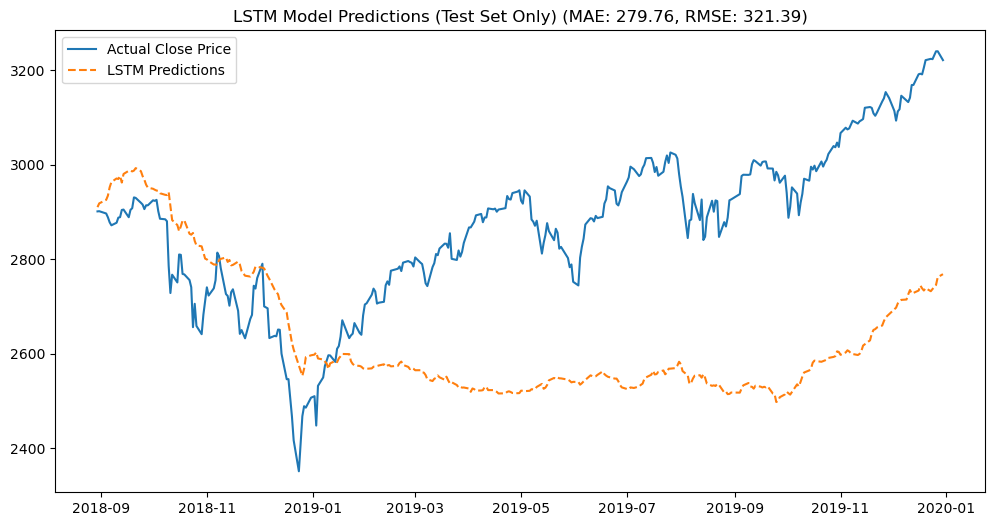

(279.76298257976237, 321.385338854691)

In [31]:

plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size:], y_test_actual, label="Actual Close Price")
plt.plot(df.index[train_size:], y_pred_actual, label="LSTM Predictions", linestyle="dashed")
plt.legend()
plt.title(f"LSTM Model Predictions (Test Set Only) (MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f})")
plt.show()

# Output evaluation metrics
mae_lstm, rmse_lstm

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 390ms/step - loss: 0.7882 - val_loss: 0.3553
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - loss: 0.3013 - val_loss: 0.1135
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - loss: 0.1725 - val_loss: 0.0908
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - loss: 0.1375 - val_loss: 0.1308
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 541ms/step - loss: 0.1108 - val_loss: 0.2192
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - loss: 0.0940 - val_loss: 0.1451
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - loss: 0.0859 - val_loss: 0.1491
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - loss: 0.0635 - val_loss: 0.1620
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - loss: 0.0805 - val_loss: 0.2096
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - loss: 0.0544 - val_loss: 0.1911
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - loss: 0.0538 - val_loss: 0.0956
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━

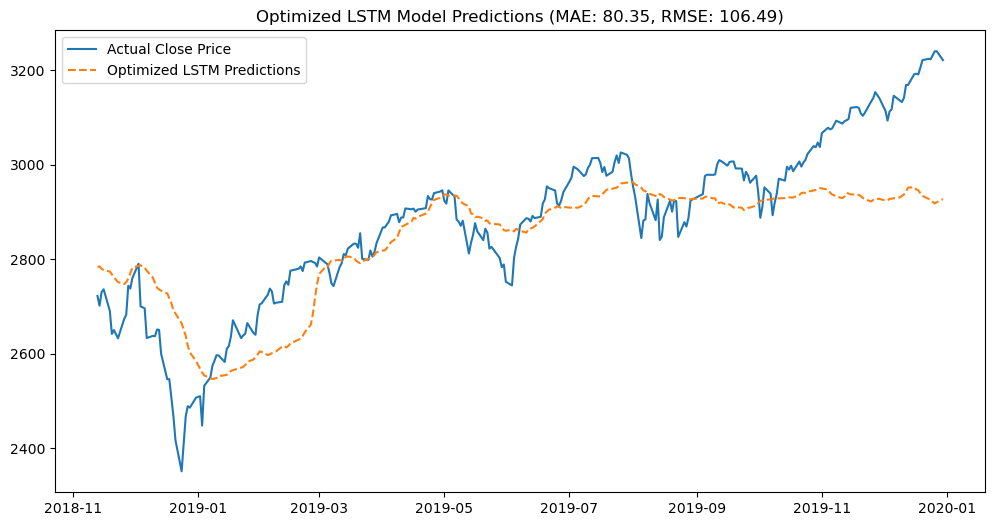

(80.35181789533466, 106.48546300851888)

In [34]:
# Import necessary libraries for LSTM optimization
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Ensure dataset is loaded and indexed properly
df.index = pd.to_datetime(df.index)

# Define target variable and exogenous features
target_col = 'Close'
exog_features = [col for col in df.columns if col not in ['Close']]

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target_col] + exog_features])

# Convert scaled data back to DataFrame for easy indexing
scaled_df = pd.DataFrame(scaled_data, columns=[target_col] + exog_features, index=df.index)

# Splitting into training and testing sets (chronologically)
train_size = int(len(df) * 2 / 3)
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, target_col, seq_length=30):  # Increased seq_length to 30 for better trend capture
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)  # Past sequence
        y.append(data.iloc[i+seq_length][target_col])  # Target variable
    return np.array(X), np.array(y)

# Define optimized sequence length (30-50 days)
seq_length = 50

# Creating training sequences
X_train, y_train = create_sequences(train, target_col, seq_length)
X_test, y_test = create_sequences(test, target_col, seq_length)

# Define an optimized LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),
    
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    
    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression (predicting closing price)
])

# Compile the model with optimized learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model with optimized parameters
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions using rolling window approach
y_pred = model.predict(X_test)

# Reverse scaling for predictions and actual values
scaler_target = MinMaxScaler()
scaler_target.fit(df[[target_col]])

y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler_target.inverse_transform(y_pred)

# Evaluate the optimized model
mae_lstm = mean_absolute_error(y_test_actual, y_pred_actual)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size + seq_length:], y_test_actual, label="Actual Close Price")
plt.plot(df.index[train_size + seq_length:], y_pred_actual, label="Optimized LSTM Predictions", linestyle="dashed")
plt.legend()
plt.title(f"Optimized LSTM Model Predictions (MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f})")
plt.show()

# Output evaluation metrics
mae_lstm, rmse_lstm
